In [67]:
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('ggplot')

### Discriminative Statistical Models

Our main guide in the selection process of statistical models is their reflection of a simple phenomena that suit our use-case? we want a few highly scored keywords that seperate from the rest in a kind of pyramidal pattern : the majority of candidate keywords have low/mediocre scores, the higher the score the lesser candidate keywords there are.

Mathematically, we want a probability distribution that features :

* high positive skewness
* low kurtosis

(to do : set the formal framework)

Doing so, we selected 4 continuous probability models :

* Power Law
* Gamma
* Pareto
* Power Law Lognormal

Let's fine tune for the subset of parameters we are really interested in.

#### Power Law

Text(0.5, 1.0, 'Power Law Probability Distribution Functions \n(wrt different values of scale parameter $\\alpha$)')

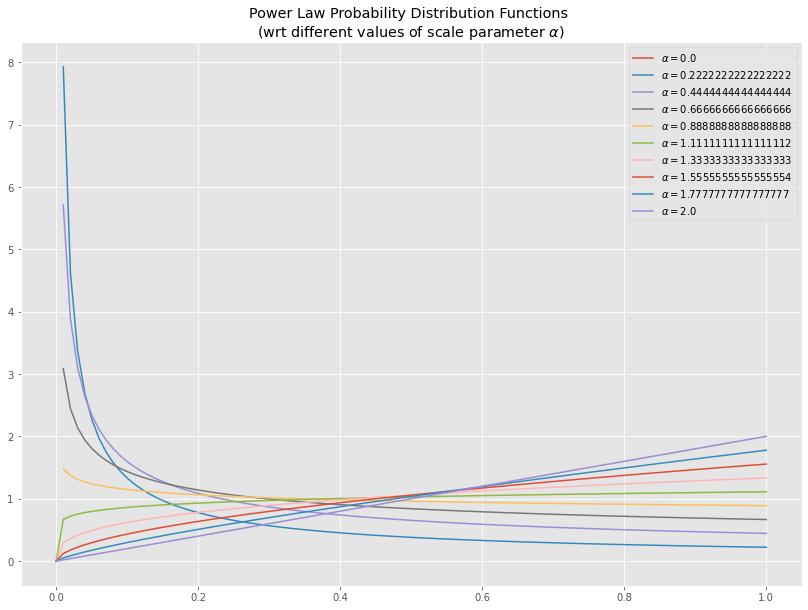

In [68]:
from scipy.stats import powerlaw

dist = powerlaw

args = np.linspace(0,2,10)
loc=0
scale=1

x_axis_range = {'start':list(),
                 'end':list()}

for arg in args:
    
    x_axis_range['start'].append(dist.ppf(0.01, arg, loc=loc, scale=scale))
    x_axis_range['end'].append(dist.ppf(0.99, arg, loc=loc, scale=scale))    

start = min(x_axis_range['start'])
end = max(x_axis_range['end'])

x = np.linspace(0,1,100)

plt.figure(figsize=(14,10))

for arg in args:

    plt.plot(x,dist.pdf(x,arg,loc,scale),label=r'$\alpha = {}$'.format(arg))

plt.legend()
plt.title('Power Law Probability Distribution Functions \n' + r'(wrt different values of scale parameter $\alpha$)')


Selected range for the scale parameter : $0<\alpha<1$

#### Gamma

Text(0.5, 1.0, 'Gamma Probability Distribution Functions \n(wrt different values of scale parameter $\\alpha$)')

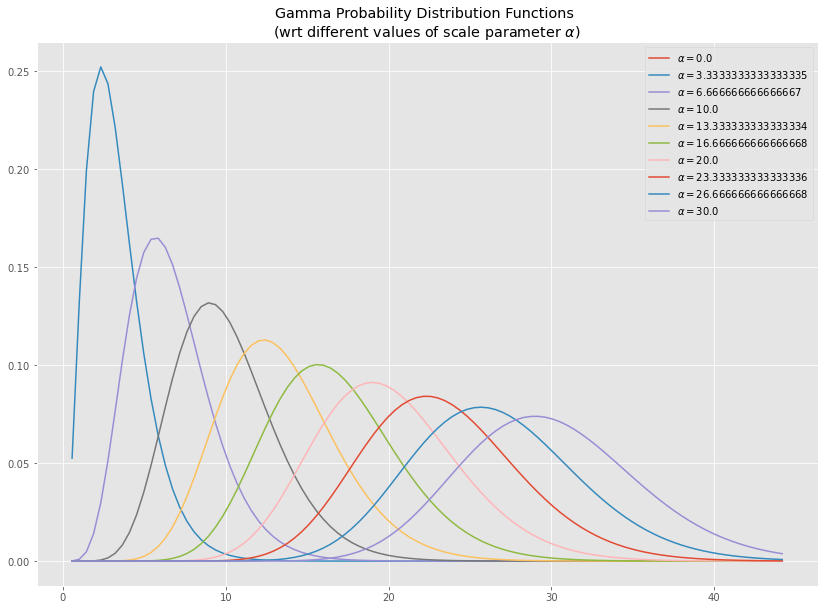

In [69]:
from scipy.stats import gamma

dist = gamma

args = np.linspace(0,30,10)
loc=0
scale=1

x_axis_range = {'start':list(),
                 'end':list()}

for arg in args:
    
    x_axis_range['start'].append(dist.ppf(0.01, arg, loc=loc, scale=scale))
    x_axis_range['end'].append(dist.ppf(0.99, arg, loc=loc, scale=scale))    

start = min([x for x in x_axis_range['start'] if str(x)!='nan'])
end = max([x for x in x_axis_range['end'] if str(x)!='nan'])


x = np.linspace(start,end,100)

plt.figure(figsize=(14,10))

for arg in args:

    plt.plot(x,dist.pdf(x,arg,loc,scale),label=r'$\alpha = {}$'.format(arg))

plt.legend()
plt.title('Gamma Probability Distribution Functions \n' + r'(wrt different values of scale parameter $\alpha$)')


Selected range for the scale parameter : $0<\alpha<15$

#### Pareto

Text(0.5, 1.0, 'Pareto Probability Distribution Functions \n(wrt different values of scale parameter $\\alpha$)')

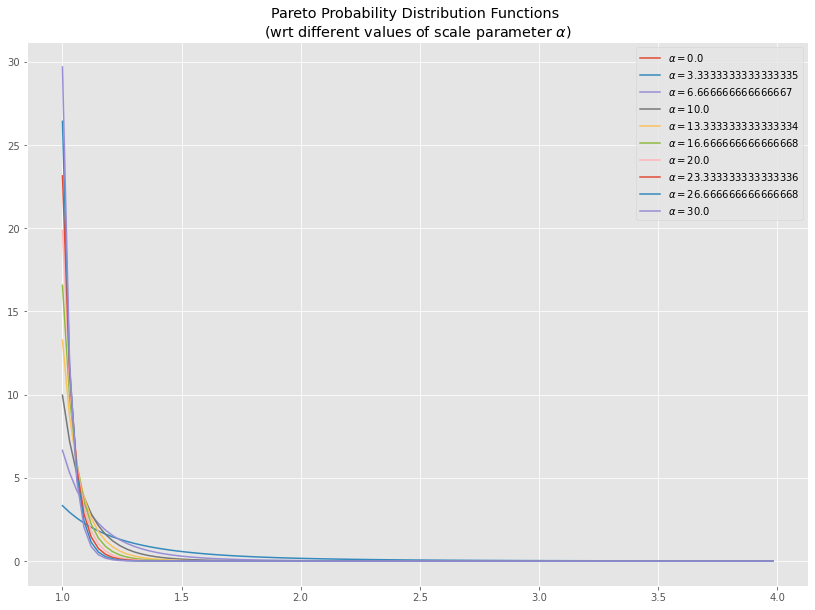

In [70]:
from scipy.stats import pareto

dist = pareto

args = np.linspace(0.0,30,10)
loc=0
scale=1

x_axis_range = {'start':list(),
                 'end':list()}

for arg in args:
    
    x_axis_range['start'].append(dist.ppf(0.01, arg, loc=loc, scale=scale))
    x_axis_range['end'].append(dist.ppf(0.99, arg, loc=loc, scale=scale))    

start = min([x for x in x_axis_range['start'] if str(x)!='nan'])
end = max([x for x in x_axis_range['end'] if str(x)!='nan'])


x = np.linspace(start,end,100)

plt.figure(figsize=(14,10))

for arg in args:

    plt.plot(x,dist.pdf(x,arg,loc,scale),label=r'$\alpha = {}$'.format(arg))

plt.legend()
plt.title('Pareto Probability Distribution Functions \n' + r'(wrt different values of scale parameter $\alpha$)')


Pareto PDFs are always fine for our problem, for any value of $\alpha>0$ 

#### Power Law Lognormal

Text(0.5, 1.0, 'Power Law Lognormal Probability Distribution Functions \n(wrt different values of scale parameter $\\alpha$)')

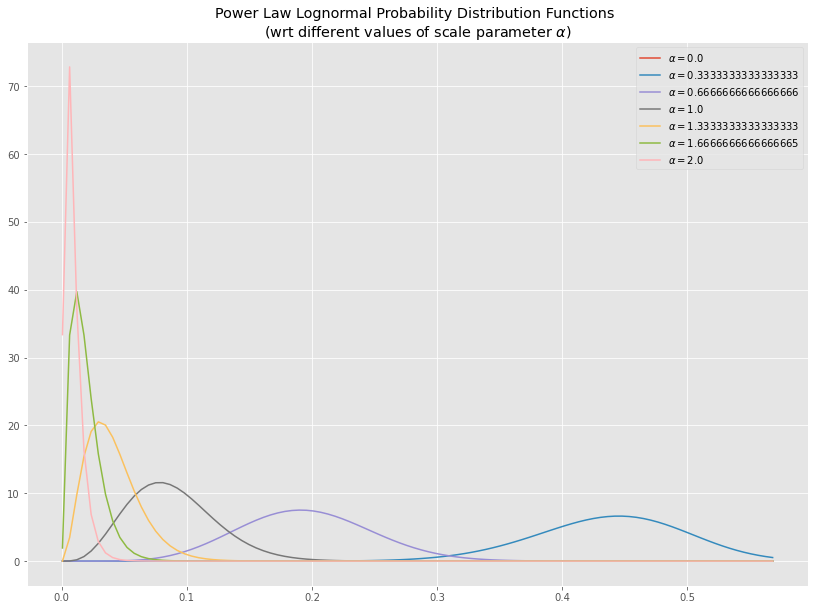

In [71]:
from scipy.stats import powerlognorm

dist = powerlognorm

c = 100
args = np.linspace(0,2,7)
loc=0
scale=1

x_axis_range = {'start':list(),
                 'end':list()}

for arg in args:
    
    x_axis_range['start'].append(dist.ppf(0.01,c,arg, loc=loc, scale=scale))
    x_axis_range['end'].append(dist.ppf(0.99,c,arg, loc=loc, scale=scale))    

start = min([x for x in x_axis_range['start'] if str(x)!='nan'])
end = max([x for x in x_axis_range['end'] if str(x)!='nan'])


x = np.linspace(start,end,100)

plt.figure(figsize=(14,10))

for arg in args:

    plt.plot(x,dist.pdf(x,c,arg,loc,scale),label=r'$\alpha = {}$'.format(arg))

plt.legend()
plt.title('Power Law Lognormal Probability Distribution Functions \n' + r'(wrt different values of scale parameter $\alpha$)')


Selected range for the scale parameter : $0<\alpha<1$